### Závěrečný projet - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
- Druhou část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
3. Datová analýza - analýza dat
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [ ]:
from bs4 import BeautifulSoup
import requests

strana = 1
seznam_bytu = [] 

while True:
    mesto = 'zlin'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    """
    ------------------------
    Zde pište svůj kód 
    ------------------------
    """
    # Najdeme si všechny inzerce
    
    
    list_inzeratu = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
    list_inzeratu_filtered = [
        item for item in list_inzeratu
        if not (
            "tip" in item.get("id", "").lower()  # Odstraníme položky s "tip" v ID
            or "adresar" in item.find("a", href=True)["href"]  # Odstraníme makléřské reklamy
            or "TIP:" in item.get_text()  # Odstraníme text obsahující "TIP:"
        )
    ]

    
    for byt in list_inzeratu_filtered:
            odkaz_tag = byt.find('a', href=True)
            odkaz = 'https://www.sreality.cz' + odkaz_tag['href'] if odkaz_tag else None  # odkaz na byt
            
            cena_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e')  # cena bytu 
            cena = cena_tag.get_text(strip=True) if cena_tag else "Neuvedeno"
            
            rozmer_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
            if rozmer_tag:
               text = rozmer_tag.get_text(strip=True)
               rozmery = " ".join(text.split()[3:])  # Odstraní první dvě slova
            else:
                rozmery = "Neuvedeno"
                
            dispozice = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
            if rozmer_tag:
               text = dispozice.get_text(strip=True)
               dispozice = " ".join(text.split()[2:3])  # Odstraní první dvě slova
            else:
                dispozice = "Neuvedeno"
                
            lokace_tag = byt.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')  # Musíš ověřit třídu
            lokace = lokace_tag[1].text.strip() if lokace_tag else None
            seznam_bytu.append(
               {
                 'url': odkaz,
                 'cena': cena,
                 'rozmer': rozmery,
                 'dispozice': dispozice,
                 'lokace': lokace
                }
            )
        

    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text
     
    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

In [42]:
seznam_bytu

[]

In [40]:
import pandas as pd

df = pd.DataFrame(seznam_bytu)


In [41]:
df.to_csv('byty_zlin_kontrola.csv')

In [35]:
# data mimo while cyklus, abych mohla spouštět kód  samostatně 
list_inzeratu = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
list_inzeratu_filtered = [
    item for item in list_inzeratu
    if not (
        "tip" in item.get("id", "").lower()  # Odstraníme položky s "tip" v ID
        or "adresar" in item.find("a", href=True)["href"]  # Odstraníme makléřské reklamy
        or "TIP:" in item.get_text()  # Odstraníme text obsahující "TIP:"
    )
]

seznam_bytu = [] 
for byt in list_inzeratu_filtered:
        odkaz_tag = byt.find('a', href=True)
        odkaz = 'https://www.sreality.cz' + odkaz_tag['href'] if odkaz_tag else None  # odkaz na byt
        
        cena_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e')  # cena bytu 
        cena = cena_tag.get_text(strip=True) if cena_tag else "Neuvedeno"
        
        rozmer_tag = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
        if rozmer_tag:
           text = rozmer_tag.get_text(strip=True)
           rozmery = " ".join(text.split()[3:])  # Odstraní první dvě slova
        else:
            rozmery = "Neuvedeno"
            
        dispozice = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') # rozměr bytu 
        if rozmer_tag:
           text = dispozice.get_text(strip=True)
           dispozice = " ".join(text.split()[2:3])  # Odstraní první dvě slova
        else:
            dispozice = "Neuvedeno"
            
        lokace_tag = byt.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')  # Musíš ověřit třídu
        lokace = lokace_tag[1].text.strip() if lokace_tag else None
        seznam_bytu.append(
        {
            'url': odkaz,
            'cena': cena,
            'rozmer': rozmery,
            'dispozice': dispozice,
            'lokace': lokace
        })
        print(seznam_bytu)

### DATA PROCESSING

In [45]:
import pandas as pd

df = pd.read_csv('byty_zlin.csv')

In [ ]:
df.head()

In [ ]:
df.info()

### Čištění a přetypování dat

In [ ]:
#chci přetypovat cenu nejdřív ji musím očistit 
# Čištění ceny - odstranění měny, pevné mezery a textu "měsíc"
df['cena'] = df['cena'].str.replace('Kč/měsíc', '').str.replace(' ','').str.replace(r'\xa0', ' ', regex=True).str.replace(r'\s+', '', regex=True)
df['cena'] = pd.to_numeric(df['cena'], errors='coerce')
df['cena']   # cena se změnila na float64



In [ ]:
df.info()  # cena se z měnila na float64

In [55]:
df['cena'] = df['cena'].fillna(0)   # Nulové hodnoty budou 0

In [ ]:
df['cena'] = df['cena'].astype(int)  # přetypovávám cenu z float na integer
df['cena'] 

### Čištění a úprava proměnné lokace

In [ ]:
print(df['lokace'].unique())  # Zjistím unikátní hodnoty ve sloupci lokace   

In [ ]:
df['ulice'] = df['lokace'].str.split(',').str[0]  # Vezmeme jen část před čárkou (ulice)
df['ulice']

In [ ]:
print(df['rozmer'].unique())  # Zjistím, jaké hodnoty obsahuje sloupec rozměr

### DATOVÁ ANALÝZA


###  1 průměrná cena bytů 

In [57]:

prumerna_cena_bytu = df['cena'].mean() 
print(f'Průměrná cena bytů je {prumerna_cena_bytu} Kč.')

Průměrná cena bytů je 13591.641379310346 Kč.


### 2 průměrná cena bytů pro každou dispozici 1+1, 2+1 atp a  zobrazte na grafu 

In [ ]:
df['dispozice'] = df['dispozice'].str.strip()  # Odstraním mezery na začátku a na konci
print(df['dispozice'].unique())    # Zjistím, jaké hodnoty obsahuje sloupec dispozice
df_prumerne_ceny = df.groupby('dispozice')['cena'].mean().reset_index()
df_prumerne_ceny = df_prumerne_ceny.assign(cena=df_prumerne_ceny['cena'].round(2)).sort_values(by='cena', ascending=False)
df_prumerne_ceny

In [95]:
df_prumerne_ceny.to_excel("č.2_prumerne_ceny_dispozice.xlsx", index=False, engine='openpyxl')

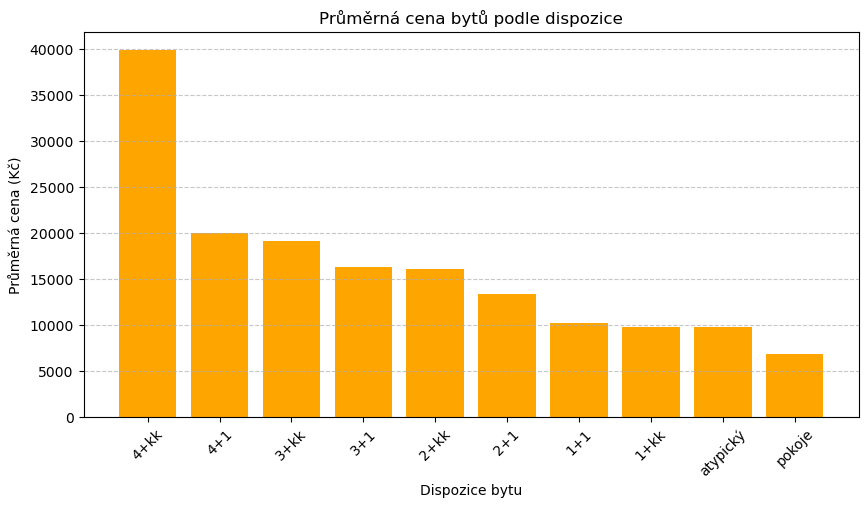

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_prumerne_ceny['dispozice'], df_prumerne_ceny['cena'], color='orange')

plt.xlabel('Dispozice bytu')
plt.ylabel('Průměrná cena (Kč)')
plt.title('Průměrná cena bytů podle dispozice')
plt.xticks(rotation=45)  # Otočení popisků na ose X pro lepší čitelnost
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
pip install xlsxwriter


In [99]:
# Vytvoření Excelu s grafem

with pd.ExcelWriter("č.2graf_ceny.xlsx", engine="xlsxwriter") as writer:
    df_prumerne_ceny.to_excel(writer, sheet_name="Data", index=False)

    workbook = writer.book
    worksheet = writer.sheets["Data"]

    # Vložení grafu
    chart = workbook.add_chart({"type": "column"})
    chart.add_series({
        "categories": ["Data", 1, 0, len(df_prumerne_ceny), 0],  # Sloupec dispozice
        "values": ["Data", 1, 1, len(df_prumerne_ceny), 1],  # Sloupec cena
        "name": "Průměrná cena bytu"
    })
    
    worksheet.insert_chart("E2", chart)  # Umístění grafu v Excelu

### 3 Jaká je průměrná velikost bytu pro každou kompozici?

In [62]:
df['rozmer'] = df['rozmer'].str.replace('m²', '', regex=True).str.strip()  # Odstraníme "m²" a mezery
df['rozmer'] = pd.to_numeric(df['rozmer'], errors='coerce')  # Převedeme na číslo, chybné hodnoty jako NaN


In [ ]:
df_prumerne_rozmery = df.groupby('dispozice')['rozmer'].mean().reset_index().round(2)    
df_prumerne_rozmery.columns = ['dispozice', 'prumerne_rozmery']
df_prumerne_rozmery

In [101]:
df_prumerne_rozmery.to_excel("č.3_prumerne_rozmery.xlsx", index=False, engine='openpyxl')

### 4 Existuje ulice, kde je vyšší koncentrace dražších bytů?

In [ ]:
df_prumerna_cena_ulice = df.groupby('ulice')['cena'].mean().reset_index().round(2)
df_prumerna_cena_ulice.columns = ['ulice', 'prumerna cena']
df_prumerna_cena_ulice.head(10)

In [103]:
df_prumerna_cena_ulice.to_excel("č.4_prumerna_cena_ulic.xlsx", index=False, engine='openpyxl')

In [ ]:
# Seřadíme ulice od nejdražších po nejlevnější:
df_prumerna_cena_ulice = df_prumerna_cena_ulice.sort_values(by='prumerna cena', ascending=False)
top_10_ulic = df_prumerna_cena_ulice.head(10)
top_10_ulic

In [105]:
top_10_ulic.to_excel("č.4b_top_10_ulic.xlsx", index=False, engine='openpyxl')

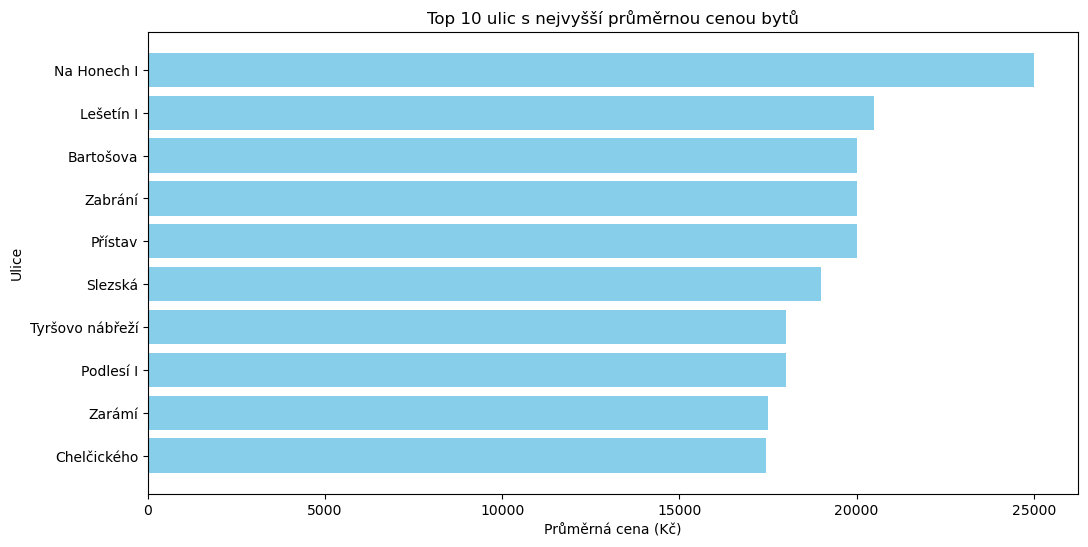

In [70]:
# Grafické znázornění TOP ulic s nejvyšší průměrnou cenou bytů
plt.figure(figsize=(12, 6))
plt.barh(top_10_ulic['ulice'], top_10_ulic['prumerna cena'], color='skyblue')
plt.xlabel('Průměrná cena (Kč)')
plt.ylabel('Ulice')
plt.title('Top 10 ulic s nejvyšší průměrnou cenou bytů')
plt.gca().invert_yaxis()  # Otočení osy y pro lepší čitelnost
plt.show()

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Uložení grafu jako obrázek
plt.figure(figsize=(12, 6))
plt.barh(top_10_ulic['ulice'], top_10_ulic['prumerna cena'], color='skyblue')
plt.xlabel('Průměrná cena (Kč)')
plt.ylabel('Ulice')
plt.title('Top 10 ulic s nejvyšší průměrnou cenou bytů')
plt.gca().invert_yaxis()
plt.savefig("graf_ulice.png", dpi=300, bbox_inches="tight")  # Uložení grafu
plt.close()  # Zavření grafu, aby se neukazoval znovu

# 2️⃣ Vytvoření Excel souboru a vložení obrázku
with pd.ExcelWriter("top_ulice.xlsx", engine="xlsxwriter") as writer:
    top_10_ulic.to_excel(writer, sheet_name="Data", index=False)  # Uložení tabulky
    
    workbook = writer.book
    worksheet = writer.sheets["Data"]
    
    # Vložení obrázku do Excelu
    worksheet.insert_image("D2", "graf_ulice.png")  # Umístění v Excelu

### 5 Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

In [86]:
# Spočítáme počet výskytů jednotlivých dispozic
df_dispozice_counts = df['dispozice'].value_counts().reset_index()
df_dispozice_counts
# Přejmenujeme sloupce pro lepší čitelnost
df_dispozice_counts.columns = ['dispozice', 'pocet_inzeratu']
df_dispozice_counts
df_dispozice_counts.to_excel("Pocet_vyskytu_kompozice.xlsx", index=False, engine='openpyxl')

### 6 Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?


In [88]:
df_drahe_byty = df[df['cena'] > 20000]  # Filtrování bytů nad 20 000 Kč
df_drahe_male_byty = df_drahe_byty[df_drahe_byty['dispozice'].isin(['2+1', '2+kk'])]  # Jen malé byty
df_drahe_male_byty


,Unnamed: 0,url,cena,rozmer,dispozice,lokace,ulice
7,7,https://www.sreality.cz/detail/pronajem/byt/2+...,25000,96,2+kk,"Lešetín I, Zlín",Lešetín I
19,19,https://www.sreality.cz/detail/pronajem/byt/2+...,20690,64,2+kk,"třída Svobody, Zlín - Malenovice",třída Svobody
113,113,https://www.sreality.cz/detail/pronajem/byt/2+...,25000,111,2+kk,"Smetanova, Zlín",Smetanova
127,127,https://www.sreality.cz/detail/pronajem/byt/2+...,22000,85,2+kk,Luhačovice,Luhačovice
135,135,https://www.sreality.cz/detail/pronajem/byt/2+...,23000,120,2+kk,"Nádražní, Luhačovice",Nádražní


In [ ]:
df_drahe_male_byty.to_excel("inzerce_drahych_malych_bytu.xlsx", index=False, engine='openpyxl')

### 7 Zjištěte minimální a maximální inzerce pro každou kompozici(dispozici) bytu. Která kompozice(dispozice) má největší rozptyl mezi minimální a maximální inzerovanou cenou

In [ ]:
df_ceny_rozptyl = df.groupby('dispozice')['cena'].agg(['min', 'max'])
df_ceny_rozptyl['rozptyl'] = df_ceny_rozptyl['max'] - df_ceny_rozptyl['min']
df_ceny_rozptyl

In [90]:
df_ceny_rozptyl.to_excel("č.7_ceny_rozptyl_kompozice.xlsx", index=False, engine='openpyxl')

In [75]:
# Najdeme dispozici s největším rozptylem  Použiju .idxmax() na sloupec rozptyl:
nejvetsi_rozptyl_dispozice = df_ceny_rozptyl['rozptyl'].idxmax()
nejvetsi_rozptyl_hodnota = df_ceny_rozptyl['rozptyl'].max()

In [76]:
print(f"Největší rozptyl cen má dispozice {nejvetsi_rozptyl_dispozice} s rozptylem {nejvetsi_rozptyl_hodnota} Kč.")

Největší rozptyl cen má dispozice 2+kk s rozptylem 25000 Kč.


In [ ]:
# Seskupení dat pro případný export z excelu
df_grouped_ceny = df.groupby('dispozice')['cena'].agg(['min', 'max', 'mean']).reset_index()
df_grouped_ceny

In [91]:
df_grouped_ceny.to_excel("č.prumerne_ceny_dispozice.xlsx", index=False, engine='openpyxl')

In [ ]:
df_grouped_velikost = df.groupby('dispozice')['rozmer'].mean().reset_index()
df_grouped_velikost

In [ ]:
df_pocty_dispozic = df['dispozice'].value_counts().reset_index()
df_pocty_dispozic.columns = ['dispozice', 'pocet']
df_pocty_dispozic

In [94]:
df_pocty_dispozic.to_excel("č.pocty_dispozic.xlsx", index=False, engine='openpyxl')

In [ ]:
pip install pandas openpyxl

In [85]:
df.to_excel("datova_analytika_bytu.xlsx", index=False, engine='openpyxl')